In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

# Experimenting and Precode

In [2]:
base = "C:/Users/leahz/OneDrive/Desktop/Quizlet/ATC4/SYSlab"

# with open(f'{base}/data/data_all.pkl', 'rb') as f:
#     data =  pickle.load(f)
data = pd.read_pickle(f'{base}/data/data_all.pkl')
data_premade = pd.read_pickle(f'{base}/data/data_premade.pkl') # This is the data after being preprocessed has index not filename
data_original = pd.read_pickle(f'G:/My Drive/Sys Lab/modified_data/new/modified_all.pkl') # This is the orginal data, it has the filename
data_spirals = pd.read_pickle(f"{base}/data/data_original_spiral.pkl")

leng = range(len(data))

In [3]:
data_premade

,X,y,index,target
0,"[-2.056546340567396, -2.056546340567396, -1.47...","[-1.3952663046302018, -1.3952663046302018, -1....",70473,"[1.4489303763088408, 1.8748890968469032]"
1,"[1.66737406371331, 1.66737406371331, 1.6673740...","[-1.9952172111690554, -1.9952172111690554, -1....",74844,"[-1.7725966988020012, 2.7933040956366777]"
2,"[0.18022639872047436, -0.056913599595946544, -...","[-1.6533837631420183, -1.5283169126774179, -1....",95145,"[2.788766380201092, 1.973554900331396]"
3,"[-1.8480943565342245, -1.7263490102539736, -1....","[1.803269661665738, 1.3158994828371586, 1.3158...",55640,"[1.499902666172703, -2.0956917689628964]"
4,"[-2.2259955480133455, -1.8726629213445662, -1....","[1.7763555742918122, 1.680749784502156, 1.4895...",31735,"[2.0139959720120904, -2.0478760172944392]"
...,...,...,...,...
32189,"[-1.9470036496822107, -1.9470036496822107, -1....","[-2.201704178130174, -2.201704178130174, -2.20...",139013,"[1.7265881421710167, 1.7704425349912787]"
32190,"[2.2845990353241943, 2.2845990353241943, 2.284...","[2.1226745220209273, 2.1226745220209273, 2.122...",93198,"[-0.8449886842978346, -1.288766674084138]"
32191,"[1.6461582494510627, 1.4821982644459757, 1.482...","[-1.5432260242699338, -1.444554283587713, -1.4...",42403,"[-1.633041450650661, 1.7129414182433536]"
32192,"[-1.9279335090084688, -1.9279335090084688, -1....","[-0.8164965809276795, -0.8164965809276795, -0....",62161,"[1.2675363954254597, 1.2247448713916351]"


In [4]:
def taylor_smooth(t, f, window_size=5):
    smoothed = np.zeros_like(f)
    half_window = window_size // 2
    
    for i in range(len(f)):
        start = max(0, i - half_window)
        end = min(len(f), i + half_window + 1)
        local_t = t[start:end]
        local_f = f[start:end]
        coeffs = np.polyfit(local_t - t[i], local_f, 1)
        smoothed[i] = np.polyval(coeffs, 0)  # Evaluate at t[i]
    
    return smoothed

In [5]:
tempx = data_premade['X'].iloc[10]
tempy = data_premade['y'].iloc[10]
t = np.linspace(0, len(tempy)) 


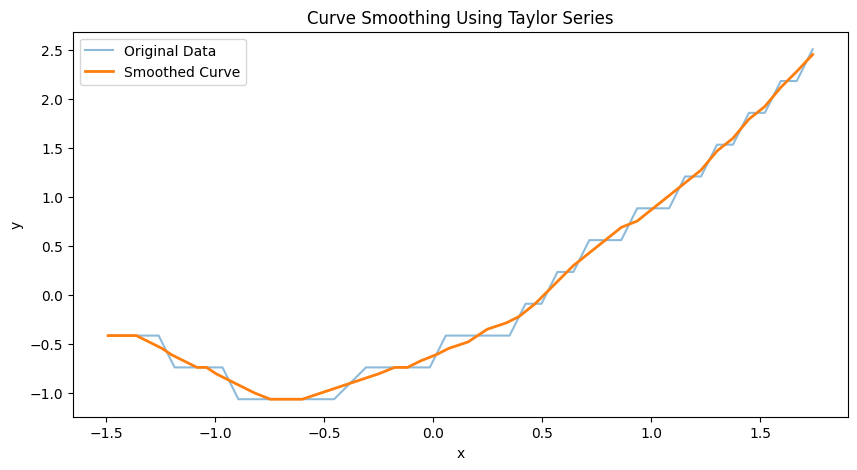

In [6]:
# Smooth x and y curves
x_smooth = taylor_smooth(t, tempx)
y_smooth = taylor_smooth(t, tempy)

# Plot original and smoothed curves
plt.figure(figsize=(10, 5))
plt.plot(tempx, tempy, label='Original Data', alpha=0.5)
plt.plot(x_smooth, y_smooth, label='Smoothed Curve', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Smoothing Using Taylor Series')
plt.show()

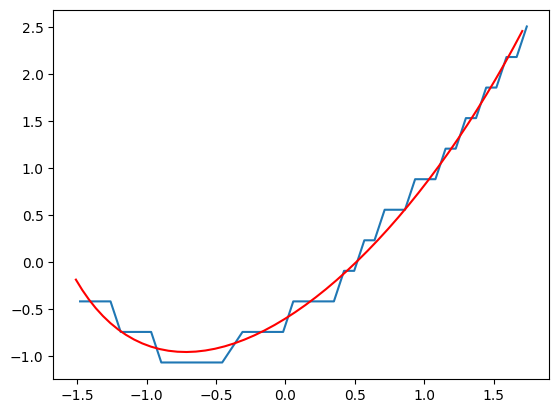

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


xhat = savgol_filter(tempx, 49, 3)
yhat = savgol_filter(tempy, 49, 3) 

plt.plot(tempx,tempy)
plt.plot(xhat,yhat, color='red')
plt.show()


# ML Approach

In [8]:
controls = pd.read_pickle("./data/controls.pkl")
data_original = pd.read_pickle(f'G:/My Drive/Sys Lab/modified_data/new/modified_all.pkl') # This is the orginal data, it has the filename


In [9]:
controls

,Filename,X,y
0,./data/hw_dataset/control/C_0001.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."
1,./data/hw_dataset/control/C_0002.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 204.0, 205.0, 205..."
2,./data/hw_dataset/control/C_0003.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."
3,./data/hw_dataset/control/C_0004.txt,"[200.0, 200.0, 200.0, 199.00202702702703, 199....","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."
4,./data/hw_dataset/control/C_0005.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."
5,./data/hw_dataset/control/C_0006.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 201...","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."
6,./data/hw_dataset/control/C_0007.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."
7,./data/hw_dataset/control/C_0008.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 203.0, 203.0, 203..."
8,./data/hw_dataset/control/C_0009.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."


In [10]:
data_premade

,X,y,index,target
0,"[-2.056546340567396, -2.056546340567396, -1.47...","[-1.3952663046302018, -1.3952663046302018, -1....",70473,"[1.4489303763088408, 1.8748890968469032]"
1,"[1.66737406371331, 1.66737406371331, 1.6673740...","[-1.9952172111690554, -1.9952172111690554, -1....",74844,"[-1.7725966988020012, 2.7933040956366777]"
2,"[0.18022639872047436, -0.056913599595946544, -...","[-1.6533837631420183, -1.5283169126774179, -1....",95145,"[2.788766380201092, 1.973554900331396]"
3,"[-1.8480943565342245, -1.7263490102539736, -1....","[1.803269661665738, 1.3158994828371586, 1.3158...",55640,"[1.499902666172703, -2.0956917689628964]"
4,"[-2.2259955480133455, -1.8726629213445662, -1....","[1.7763555742918122, 1.680749784502156, 1.4895...",31735,"[2.0139959720120904, -2.0478760172944392]"
...,...,...,...,...
32189,"[-1.9470036496822107, -1.9470036496822107, -1....","[-2.201704178130174, -2.201704178130174, -2.20...",139013,"[1.7265881421710167, 1.7704425349912787]"
32190,"[2.2845990353241943, 2.2845990353241943, 2.284...","[2.1226745220209273, 2.1226745220209273, 2.122...",93198,"[-0.8449886842978346, -1.288766674084138]"
32191,"[1.6461582494510627, 1.4821982644459757, 1.482...","[-1.5432260242699338, -1.444554283587713, -1.4...",42403,"[-1.633041450650661, 1.7129414182433536]"
32192,"[-1.9279335090084688, -1.9279335090084688, -1....","[-0.8164965809276795, -0.8164965809276795, -0....",62161,"[1.2675363954254597, 1.2247448713916351]"


In [11]:
data_original

,Filename,index,angle,X,y,length
0,./data/hw_dataset/parkinson/P_02100001.txt,51,144,"[197.8960113960114, 197.8960113960114, 197.896...","[207.0, 207.0, 207.0, 208.0, 208.0, 208.0, 209...",50
1,./data/hw_dataset/parkinson/P_02100001.txt,52,21,"[197.8960113960114, 197.8960113960114, 197.896...","[207.0, 207.0, 208.0, 208.0, 208.0, 209.0, 209...",50
2,./data/hw_dataset/parkinson/P_02100001.txt,53,117,"[197.8960113960114, 197.8960113960114, 197.896...","[207.0, 208.0, 208.0, 208.0, 209.0, 209.0, 209...",50
3,./data/hw_dataset/parkinson/P_02100001.txt,54,282,"[197.8960113960114, 197.8960113960114, 197.896...","[208.0, 208.0, 208.0, 209.0, 209.0, 209.0, 209...",50
4,./data/hw_dataset/parkinson/P_02100001.txt,55,142,"[197.8960113960114, 197.8960113960114, 197.896...","[208.0, 208.0, 209.0, 209.0, 209.0, 209.0, 210...",50
...,...,...,...,...,...,...
162362,./data/new_dataset/parkinson/H_p000-0043.txt,1755,19,"[395.7121409921671, 395.7121409921671, 396.676...","[215.0, 208.0, 202.0, 197.0, 193.0, 190.0, 188...",50
162363,./data/new_dataset/parkinson/H_p000-0043.txt,1756,35,"[395.7121409921671, 396.6762402088773, 396.676...","[208.0, 202.0, 197.0, 193.0, 190.0, 188.0, 186...",50
162364,./data/new_dataset/parkinson/H_p000-0043.txt,1757,199,"[396.6762402088773, 396.6762402088773, 397.640...","[202.0, 197.0, 193.0, 190.0, 188.0, 186.0, 186...",50
162365,./data/new_dataset/parkinson/H_p000-0043.txt,1758,306,"[396.6762402088773, 397.64033942558746, 398.60...","[197.0, 193.0, 190.0, 188.0, 186.0, 186.0, 186...",50


In [12]:
print(len(data_premade))

160967


In [13]:
from scipy.spatial import KDTree
# Precompute KDTree for each control file
control_trees = []
for index, control_file in controls.iterrows():
    control_data = np.column_stack((control_file["X"], control_file["y"]))
    control_trees.append(KDTree(control_data))

In [17]:
from scipy.spatial import KDTree
from tqdm import tqdm
import numpy as np

org_mse = []
mean_square_errors = []
translated = {"X":[], "y":[]}

for _, row in tqdm(data_premade.iterrows(), total=len(data_premade)):  # Include progress bar
    data_find = data_original.loc[row['index']]
    points = np.column_stack((data_find["X"], data_find["y"]))
    min_mse = float("inf")
    min_close_seg = 0 # This is the cloest segment
    for tree in control_trees:
        distances, indices = tree.query(points)
        closest_segments = np.array([tree.data[idx] for idx in indices])
        
        mse = np.sum((closest_segments - points) ** 2)
        if mse < min_mse:
            min_mse = mse
            min_close_seg = closest_segments
    
    offset_x = min_close_seg[:, 0] - points[:, 0]
    offset_y = min_close_seg[:, 1] - points[:, 1]

    # Calculate the average offset for X and Y directions
    avg_offset_x = np.mean(offset_x)
    avg_offset_y = np.mean(offset_y)

    # Apply the translations to the orange line
    orange_line_x_translated = min_close_seg[:, 0] - avg_offset_x
    orange_line_y_translated = min_close_seg[:, 1] - avg_offset_y
    translated["X"].append(orange_line_x_translated)
    translated["y"].append(orange_line_y_translated)

    temp = np.column_stack((orange_line_x_translated, orange_line_y_translated))
    mse = np.sum((temp - points) ** 2)
    mean_square_errors.append(mse)
    org_mse.append(min_mse)
    



100%|██████████| 160967/160967 [04:30<00:00, 594.15it/s]


In [18]:
translated = pd.DataFrame(translated)

In [19]:
def reject_outliers(data, m=4.):
    ranged = range(0,len(data))
    data = np.asarray(data)  # Ensure input is a NumPy array
    d = np.abs(data - np.median(data))  # Deviation from the median
    mdev = np.median(d)  # Median of the deviations
    if mdev == 0:  # Handle case where mdev is zero
        return data
    s = d / mdev
    ranged = np.where(s<m)[0]
    return data[s < m], ranged 

In [20]:
data_no_outliers, ranged = reject_outliers(mean_square_errors)

In [21]:
import pickle
data = {'translated': translated, 'ranged': ranged}
# Save the data to a PKL file
with open('data/smooth_translated.pkl', 'wb') as file:
    pickle.dump(data, file)

# Getting Angle + Normalize???

In [27]:
import pickle
with open('data/smooth_translated.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
translated = loaded_data['translated']
ranged = loaded_data['ranged']

In [28]:

def get_subset(premade, compiled, indexes): 
    #  format ([Xi, X2. . . Xf], [yi, y2, . . . yf])
    subset = []
    for _ in tqdm(indexes): # was len(X)
        row = premade.iloc[_]
        compiled_row = compiled.iloc[_]

        angle = row["angle"] # Replace with my angle 
        theta = np.radians(angle)  # Convert the angle to radians
        rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
                                    [np.sin(theta), np.cos(theta)]])
        
        combined_array = np.column_stack((data_find["X"], data_find["y"]))

        rotated = np.dot(combined_array, rotation_matrix)
        shape = 50
        X_all = combined_array[:, 0 ] # This is for X data and x coordinate value
        Y_all = combined_array[:, 1 ]
        subset.append((row["Filename"], _, angle, X_all, Y_all, shape))
    return subset


In [30]:
subset = get_subset(data_original, translated, ranged)

100%|██████████| 131358/131358 [00:14<00:00, 8850.08it/s] 


In [32]:
df = pd.DataFrame(subset, columns=['Filename', 'index', 'angle', 'X', 'y', 'length']) 
df.to_pickle("data/control_original.pkl") # original = with the angles, premade = 

In [37]:
import tqdm

In [38]:
import random
def save_data_mean_std(arr, filename):
    normalized_data = []
    for inner in tqdm.tqdm(arr):
        mean = np.mean(inner)
        std = np.std(inner)
        normalized_arr = (inner - mean) / std
        if not np.isnan(normalized_arr[0]): normalized_data.append(normalized_arr)
    random.shuffle(normalized_arr)
    data = {}
    data['train'], data['test'] = normalized_data[:2*len(arr)//3], normalized_data[2*len(arr)//3:]
    import pickle as pkl
    with open(filename, 'wb') as file:
        pkl.dump(data, file)

In [39]:
import pickle as pkl
def save_data_mean_std_all(arrX, arrY, filename):
    normalized_data = {'X':[], 'y':[]}
    df = pd.DataFrame()
    for i in tqdm.tqdm(range(len(arrX))):
        innerX = arrX[i]
        innerY = arrY[i]
        meanX = np.mean(innerX)
        stdX = np.std(innerX)
        meanY = np.mean(innerY)
        stdY = np.std(innerY)
        normalized_arr_X = (innerX - meanX) / stdX
        normalized_arr_y = (innerY - meanY) / stdY

        if not np.isnan(normalized_arr_X[0]) and not np.isnan(normalized_arr_y[0]): 
            normalized_data['X'].append(normalized_arr_X)
            normalized_data['y'].append(normalized_arr_y)
    data = pd.DataFrame(normalized_data)
    data.to_pickle(filename)
    return data
    

In [40]:
arr = list(df['X'].copy())
save_data_mean_std(arr, 'data/premade_data_X.pkl')
arr = list(df['y'].copy())
save_data_mean_std(arr, 'data/premade_data_y.pkl')

100%|██████████| 131358/131358 [00:03<00:00, 37857.41it/s]


In [41]:
arrX = list(df['X'].copy())
arrY = list(df['y'].copy())
save_data_mean_std_all(arrX, arrY, 'data/premade_data_all.pkl')

100%|██████████| 131358/131358 [00:07<00:00, 18752.21it/s]


,X,y
0,"[-2.1832400154313, -2.1832400154313, -2.183240...","[1.6905537182423982, 1.6905537182423982, 1.552..."
1,"[-2.1832400154313, -2.1832400154313, -2.183240...","[1.6905537182423982, 1.6905537182423982, 1.552..."
2,"[-2.1832400154313, -2.1832400154313, -2.183240...","[1.6905537182423982, 1.6905537182423982, 1.552..."
3,"[-2.1832400154313, -2.1832400154313, -2.183240...","[1.6905537182423982, 1.6905537182423982, 1.552..."
4,"[-2.1832400154313, -2.1832400154313, -2.183240...","[1.6905537182423982, 1.6905537182423982, 1.552..."
...,...,...
131353,"[-2.1832400154313, -2.1832400154313, -2.183240...","[1.6905537182423982, 1.6905537182423982, 1.552..."
131354,"[-2.1832400154313, -2.1832400154313, -2.183240...","[1.6905537182423982, 1.6905537182423982, 1.552..."
131355,"[-2.1832400154313, -2.1832400154313, -2.183240...","[1.6905537182423982, 1.6905537182423982, 1.552..."
131356,"[-2.1832400154313, -2.1832400154313, -2.183240...","[1.6905537182423982, 1.6905537182423982, 1.552..."


# Model

In [3]:
import pandas as pd
import numpy as np
import tqdm as tqdm
parkinson = pd.read_pickle("data/control_original.pkl")
control = pd.read_pickle("data/premade_data_all.pkl")

In [4]:
control_X = np.array(control['X'])
control_y = np.array(control['y'])
parkinson_X = np.array(parkinson['X'])
parkinson_y = np.array(parkinson['y'])

In [5]:
X = []
for i in tqdm.tqdm(range(len(control_X))):
    exp = np.column_stack((control_X[i], control_y[i]))
    X.append(exp)

100%|██████████| 131358/131358 [00:00<00:00, 264008.12it/s]


In [6]:
y = []
for i in tqdm.tqdm(range(len(parkinson_X))):
    exp = np.column_stack((parkinson_X[i], parkinson_y[i]))
    y.append(exp)

  0%|          | 0/131358 [00:00<?, ?it/s]

100%|██████████| 131358/131358 [00:00<00:00, 259967.63it/s]


In [8]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X[0].shape

(50, 2)

In [11]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X[0].shape[1],)),  # Input layer (size matches the number of points in the orange line)
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(X[0].shape[1])  # Output layer (same size as the input to predict the blue line)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50


KeyboardInterrupt: 

In [ ]:

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Make predictions
predictions = model.predict(X_test)

# Example: Predict the blue line for a new orange line
new_orange_line = np.array([-2.1832400154313] * X.shape[1])  # Replace with actual data
predicted_blue_line = model.predict(new_orange_line.reshape(1, -1))
print("Predicted Blue Line:", predicted_blue_line)